   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

/tmp/ipython-input-3-3555425746.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3-3555425746.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

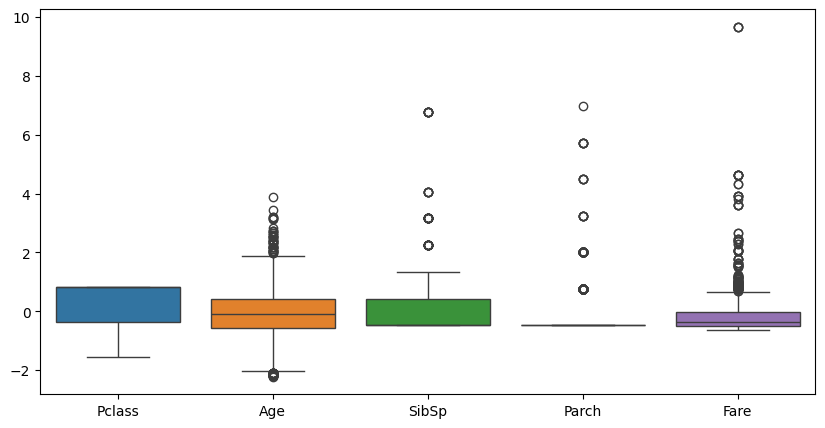

In [3]:
# 📦 Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update path if needed)
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Explore basic information
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


# 🧼 Step 2: Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)


# 🔢 Step 3: Drop unnecessary columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# 🔢 Step 4: Encode Categorical Features
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


# 📏 Step 5: Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns before scaling
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Survived' if it's considered a target variable and not for scaling
if 'Survived' in numerical_cols:
    numerical_cols.remove('Survived')


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# 📊 Step 6: Visualize and Remove Outliers
plt.figure(figsize=(10, 5))
# Select only numerical columns for boxplot
sns.boxplot(data=df[numerical_cols])
plt.show()

# Remove outliers using IQR - apply only to numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers in numerical columns
outlier_mask = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the DataFrame to remove rows with outliers in numerical columns
df = df[~outlier_mask]